# Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Load Data

In [4]:
raw_data = pd.read_csv('Dataset Penjualan Mobil.csv')
raw_data.head()

,Brand,Body,Mileage,EngineVolume,Engine Type,Registration,Year,Model,Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,4200.0
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,7900.0
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,13300.0
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,23000.0
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,18300.0
...,...,...,...,...,...,...,...,...,...
95,Mercedes-Benz,sedan,405,2.0,Diesel,yes,1992,200,4000.0
96,Renault,other,131,1.5,Diesel,yes,2011,Kangoo,11000.0
97,Mercedes-Benz,sedan,138,2.0,Petrol,yes,2007,E-Class,14500.0
98,BMW,sedan,50,2.5,Petrol,yes,1988,520,4099.0


# Data Preprocessing

### Exploring the descriptive statistics

In [5]:
raw_data.describe(include='all')

,Brand,Body,Mileage,EngineVolume,Engine Type,Registration,Year,Model,Price
count,4345,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345,4173.000000
unique,7,6,NaN,NaN,4,2,NaN,309,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,NaN
freq,936,1649,NaN,NaN,2019,3947,NaN,199,NaN
mean,NaN,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN,19418.746935
std,NaN,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN,25584.242620
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN,600.000000
25%,NaN,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN,6999.000000
50%,NaN,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN,11500.000000
75%,NaN,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN,21700.000000


### Determine unnecessary variable

In [6]:
data = raw_data.drop(['Model'], axis = 1)

In [7]:
data.describe(include='all')

,Brand,Body,Mileage,EngineVolume,Engine Type,Registration,Year,Price
count,4345,4345,4345.000000,4195.000000,4345,4345,4345.000000,4173.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,936,1649,NaN,NaN,2019,3947,NaN,NaN
mean,NaN,NaN,161.237284,2.790734,NaN,NaN,2006.550058,19418.746935
std,NaN,NaN,105.705797,5.066437,NaN,NaN,6.719097,25584.242620
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1969.000000,600.000000
25%,NaN,NaN,86.000000,1.800000,NaN,NaN,2003.000000,6999.000000
50%,NaN,NaN,155.000000,2.200000,NaN,NaN,2008.000000,11500.000000
75%,NaN,NaN,230.000000,3.000000,NaN,NaN,2012.000000,21700.000000


### Dealing with missing value

In [8]:
data.isnull().sum()

Brand             0
Body              0
Mileage           0
EngineVolume    150
Engine Type       0
Registration      0
Year              0
Price           172
dtype: int64

In [9]:
data_no_mv = data.dropna(axis = 0)

In [10]:
data_no_mv.describe(include='all')

,Brand,Body,Mileage,EngineVolume,Engine Type,Registration,Year,Price
count,4025,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,880,1534,NaN,NaN,1861,3654,NaN,NaN
mean,NaN,NaN,163.572174,2.764586,NaN,NaN,2006.379627,19552.308065
std,NaN,NaN,103.394703,4.935941,NaN,NaN,6.695595,25815.734988
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1969.000000,600.000000
25%,NaN,NaN,90.000000,1.800000,NaN,NaN,2003.000000,6999.000000
50%,NaN,NaN,158.000000,2.200000,NaN,NaN,2007.000000,11500.000000
75%,NaN,NaN,230.000000,3.000000,NaN,NaN,2012.000000,21900.000000


### Exploring the probability distribution functions (PDFs)

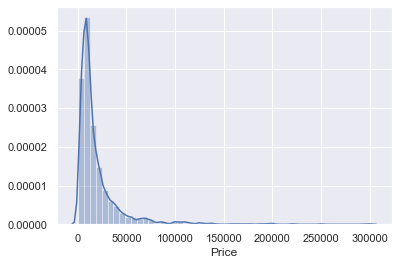

In [11]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [12]:
q = data_no_mv['Price'].quantile(0.99)
q

129812.51999999981

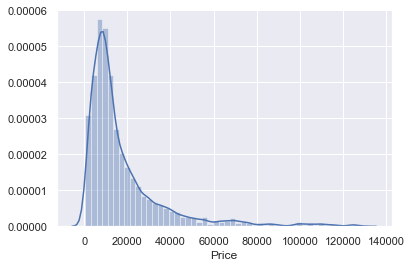

In [13]:
data_1 = data_no_mv[data_no_mv['Price'] < q ]
sns.distplot(data_1['Price'])

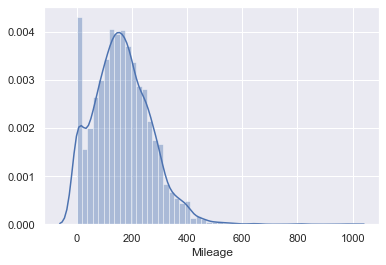

In [14]:
sns.distplot(data_1['Mileage'])

In [15]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]

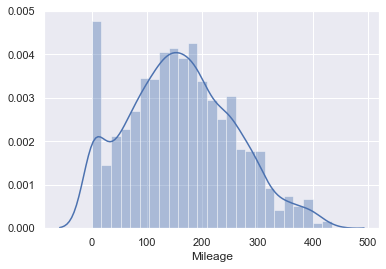

In [16]:
sns.distplot(data_2['Mileage'])

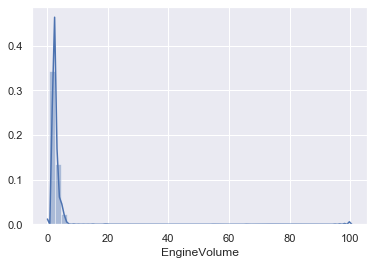

In [17]:
sns.distplot(data_2['EngineVolume'])

In [18]:
data_2['EngineVolume'].sort_values()

2512     0.60
188      0.65
2214     1.00
2196     1.00
1923     1.00
        ...  
256     99.99
1264    99.99
3114    99.99
2349    99.99
930     99.99
Name: EngineVolume, Length: 3944, dtype: float64

In [19]:
data_3 = data_2[data_2['EngineVolume'] < 6.5]

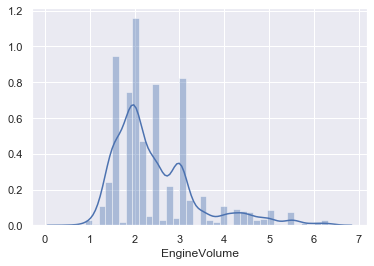

In [20]:
sns.distplot(data_3['EngineVolume'])

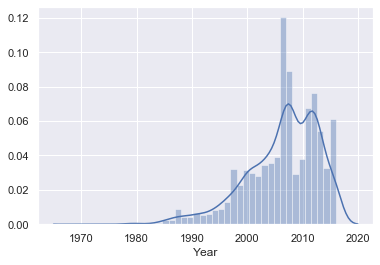

In [21]:
sns.distplot(data_3['Year'])

In [22]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

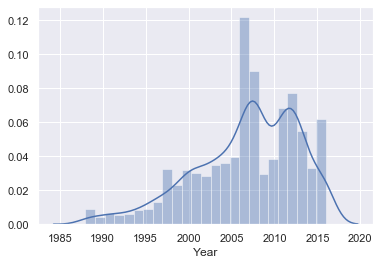

In [23]:
sns.distplot(data_4['Year'])

In [24]:
data_cleaned = data_4.reset_index(drop=True)

In [25]:
data_cleaned.describe(include='all')

,Brand,Body,Mileage,EngineVolume,Engine Type,Registration,Year,Price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,2006.709853,18194.455679
std,NaN,NaN,95.633291,0.949366,NaN,NaN,6.103870,19085.855165
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,800.000000
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,2003.000000,7200.000000
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,2008.000000,11700.000000
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,2012.000000,21700.000000


# Examining Assumptions

### Check linearity with scatterplot

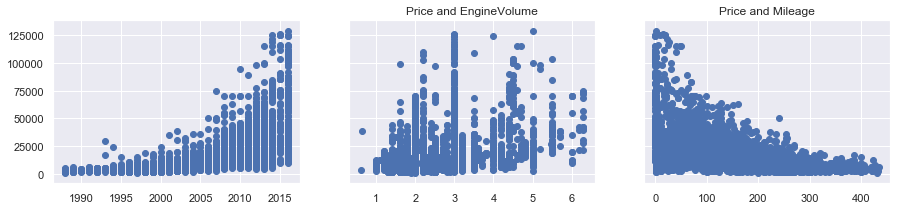

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax2.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineVolume'], data_cleaned['Price'])
ax2.set_title('Price and EngineVolume')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

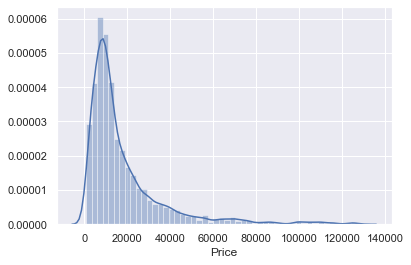

In [27]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumption

In [28]:
# Transformasi Log
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

data_cleaned.head()

,Brand,Body,Mileage,EngineVolume,Engine Type,Registration,Year,Price,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,4200.0,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,7900.0,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,13300.0,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,23000.0,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,18300.0,9.814656


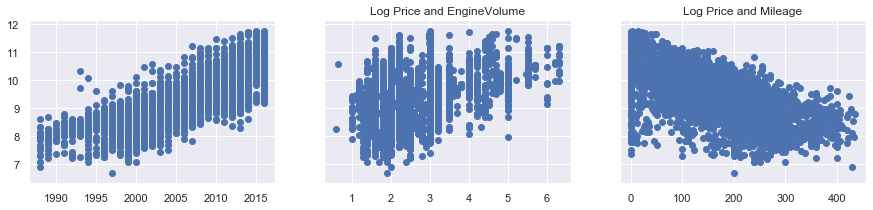

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax2.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineVolume'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineVolume')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [30]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)
data_cleaned.head()

,Brand,Body,Mileage,EngineVolume,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


### Multicollinearity

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineVolume']]
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [32]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineVolume


In [33]:
data_no_multi = data_cleaned.drop(['Year'], axis = 1)

### Create Dummy Variables

In [34]:
data_with_dummies = pd.get_dummies(data_no_multi, drop_first=True)
data_with_dummies.head()

,Mileage,EngineVolume,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange the column

In [35]:
data_with_dummies.columns.values

array(['Mileage', 'EngineVolume', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [36]:
cols = ['log_price', 'Mileage', 'EngineVolume', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [37]:
data_preprocessed = data_with_dummies[cols]

In [38]:
data_preprocessed.head()

,log_price,Mileage,EngineVolume,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

### Declare the inputs and the targets

In [39]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

### Scale the data

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

### Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [43]:
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_hat = reg.predict(x_train)

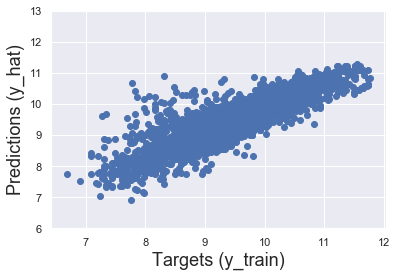

In [45]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.ylim(6, 13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

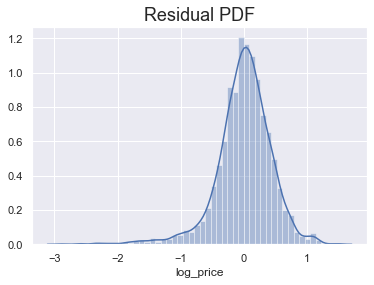

In [46]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

In [47]:
reg.score(x_train, y_train)

0.744996578792662

### Finding the weights and bias

In [48]:
reg.intercept_

9.415239458021299

In [49]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [50]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineVolume,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


# Testing

In [51]:
y_hat_test = reg.predict(x_test)

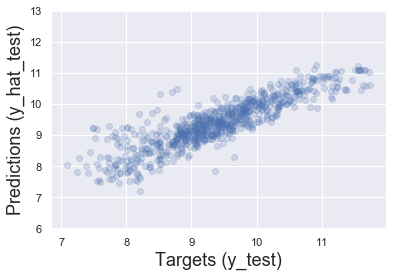

In [52]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.ylim(6, 13)
plt.show()

In [59]:
df_perform = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

In [60]:
df_perform['Target'] = np.exp(y_test.reset_index(drop=True))

In [61]:
df_perform['Residual'] = df_perform['Target'] - df_perform['Prediction']

In [62]:
df_perform['Difference%'] = np.absolute(df_perform['Residual']/df_perform['Target'] * 100)

In [71]:
pd.options.display.max_rows = 10
pd.set_option('display.float_format', lambda x: '%2f' %x)
df_perform.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.847838,30500.000000,19.152162,0.062794
742,16960.310476,16999.000000,38.689524,0.227599
60,12469.207487,12500.000000,30.792513,0.246340
110,25614.137960,25500.000000,-114.137960,0.447600
367,42703.676996,42500.000000,-203.676996,0.479240
...,...,...,...,...
657,32481.045510,6000.000000,-26481.045510,441.350758
162,9954.416247,1800.000000,-8154.416247,453.023125
451,35956.498331,6500.000000,-29456.498331,453.176897
532,10019.903027,1800.000000,-8219.903027,456.661279


In [72]:
df_perform.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080
